<a href="https://colab.research.google.com/github/marcelocanno/ELT-574-Semana-3-ES-110983-/blob/main/ELT_574_Semana_3_%3CES_1100983%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELT 574 - **APRENDIZADO DE MAQUINA** -

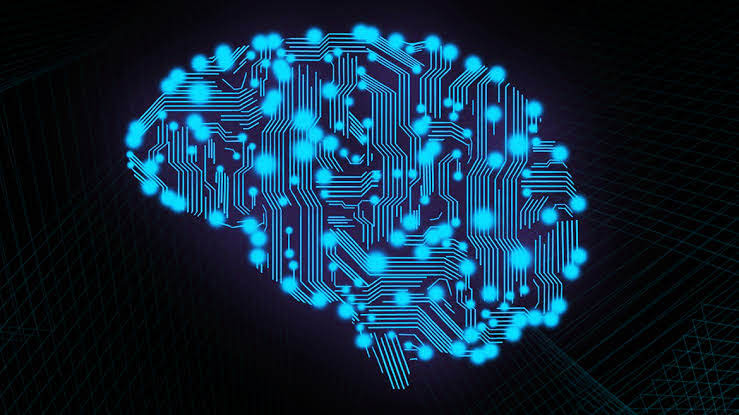

# ELT 574 - APRENDIZADO DE MÁQUINA - ROTEIRO DIRIGIDO -

##  **- Utilizando  o banco de dados keras.datasets.boston_housing -**

* - Conforme o roteiro abaixo, responda os questionamento e implemente rotinas para realizar os cálculos necessários.


* - Como relacionar as redes neurais artificiais com as células neurais?
* - Quais são as funções de ativação mais utilizadas nas redes neurais artificiais. Desenhe os gráficos de cada uma.
* - Suponha uma rede PMC composta por uma camada de entrada com 10 neurônios, conectada com uma camada escondida com 50 neurônios artificiais e uma camada de saída com 3 neurônios artificiais. Todos os neurônios utilizam a função de ativação ReLU.
* - Qual é o formato da matriz de entrada X?
* - Quais são os formatos das matrizes de pesos (Wh) e da matriz de limiares de ativação (bh) da camada escondida?
* - Quais são os formatos das matrizes de pesos (Wo) e da matriz de limiares de * - ativação (bo) da camada de saída?
* - Qual o formato da matriz de saída Y da rede PMC?
* - Escreva a equação que computa a saída Y da rede PMC em função de X, Wh, bh, Wo, e bo.
* - Quantos neurônios na camada de saída são necessários para uma rede PMC classificar um e-mail em "Spam" ou "Não-spam"? Qual função de ativação deve ser utilizada na camada de saída desta rede PMC?
* - Se você quiser construir uma rede neural artificial que identifique números escritos a mão, de 0 a 9, quantos neurônios seriam necessários na camada de saída da rede? Qual função de ativação deve ser utilizada? Por quê?
* - Utilize o notebook disponibilizado para o problema de classificação multiclasse e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 98% de precisão nas inferências. Apresenta o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.


In [1]:
# Importando as bibliotecas para análise do problema e configurando o notebook
import os

from google.colab import drive
drive.mount('/content/drive')

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('xtick', labelsize=12)

import seaborn as sns

from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import axes
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures


print('setup completo')

Mounted at /content/drive
setup completo


##  **Algoritmo para o conjunto de dados Boston Housing usando Keras**

57026/57026 [==============================] - 0s 0us/step
Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 399.2005 - mae: 17.7446 - val_loss: 222.9005 - val_mae: 12.6141
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 93.2079 - mae: 6.8016 - val_loss: 68.1795 - val_mae: 6.3184
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 45.8365 - mae: 4.4987 - val_loss: 43.2953 - val_mae: 5.1205
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 35.1151 - mae: 3.8230 - val_loss: 33.9842 - val_mae: 4.4897
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 29.3013 - mae: 3.4929 - val_loss: 27.6214 - val_mae: 4.0500
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 25.6425 - mae: 3.3051 - val_loss: 22.9200 - val_mae: 3.6755
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 22.7329 - mae: 3.0968 - val_loss: 21.2087 - val_mae:

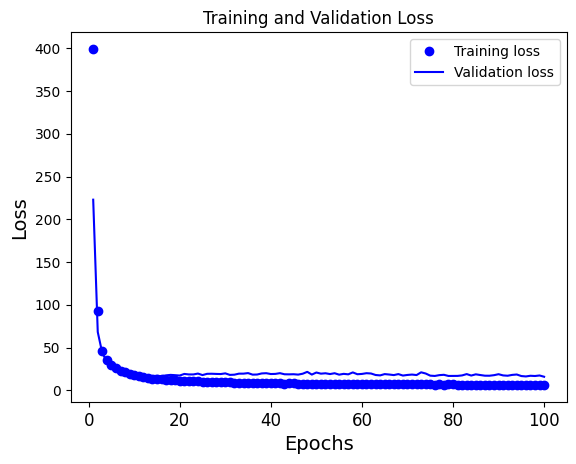

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalizar os dados
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Construir o modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=1, validation_data=(x_test, y_test))

# Plotar os resultados
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Perguntas sobre Redes Neurais e Funções de Ativação
* - Relacionamento entre redes neurais artificiais e células neurais:
    * - As redes neurais artificiais são inspiradas no funcionamento do cérebro humano, onde as células nervosas (neurônios) estão interconectadas para processar informações. Em uma rede neural artificial, os neurônios são simulados por unidades computacionais que recebem entradas, aplicam uma função de ativação e produzem uma saída.

* - Funções de ativação mais utilizadas:
    * - Algumas funções de ativação comuns são:

* - ReLU (Rectified Linear Unit):

In [3]:
def relu(x):
    return max(0, x)


* - Sigmoid

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


* - Tanh:

In [5]:
def tanh(x):
    return np.tanh(x)


* - PMC com camadas de ReLU

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Construir o modelo
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(10,)))
model.add(Dense(3, activation='relu'))


* - Respostas sobre as matrizes e equações da PMC
    * - Formato da matriz de entrada X:

* - número de amostras, número de características
    * - Formato das matrizes de pesos (Wh) e matriz de limiares de ativação (bh) da camada escondida:

    * - Wh: (10, 50)
    * - bh: (50,)

* - Formato das matrizes de pesos (Wo) e matriz de limiares de ativação (bo) da camada de saída:

    * - Wo: (50, 3)
    * - bo: (3,)

* - Formato da matriz de saída Y da rede PMC:
    * - número de amostras, número de neurônios na camada de saída

* - Equação que computa a saída Y da rede PMC:

    * - Y = ReLU(X * Wh + bh) * Wo + bo

* - Número de neurônios na camada de saída para classificar um e-mail em "Spam" ou "Não-spam":

    * - 2 neurônios (um para cada classe)

* - Função de ativação na camada de saída para classificação de e-mail:

    * - Sigmoid (para problemas de classificação binária)
Número de neurônios na camada de saída para identificação de números escritos à mão (0 a 9):

 * - 10 neurônios (um para cada classe)
Função de ativação recomendada para identificação de números escritos à mão:

    * - Softmax (para problemas de classificação multiclasse)


### **Algoritmo em Python para Classificação Multiclasse**

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4721 - accuracy: 0.8703 - val_loss: 0.2398 - val_accuracy: 0.9331
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2234 - accuracy: 0.9366 - val_loss: 0.1944 - val_accuracy: 0.9452
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1755 - accuracy: 0.9497 - val_loss: 0.1682 - val_accuracy: 0.9523
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1452 - accuracy: 0.9583 - val_loss: 0.1432 - val_accuracy: 0.9589
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1229 - accuracy: 0.9649 - val_loss: 0.1308 - val_accuracy: 0.9614
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1068 - accuracy: 0.9699 - val_loss: 0.1234 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0938 - accuracy: 0.9730 - val_loss: 0.1204 - val_accuracy: 0.9641
Epoch 

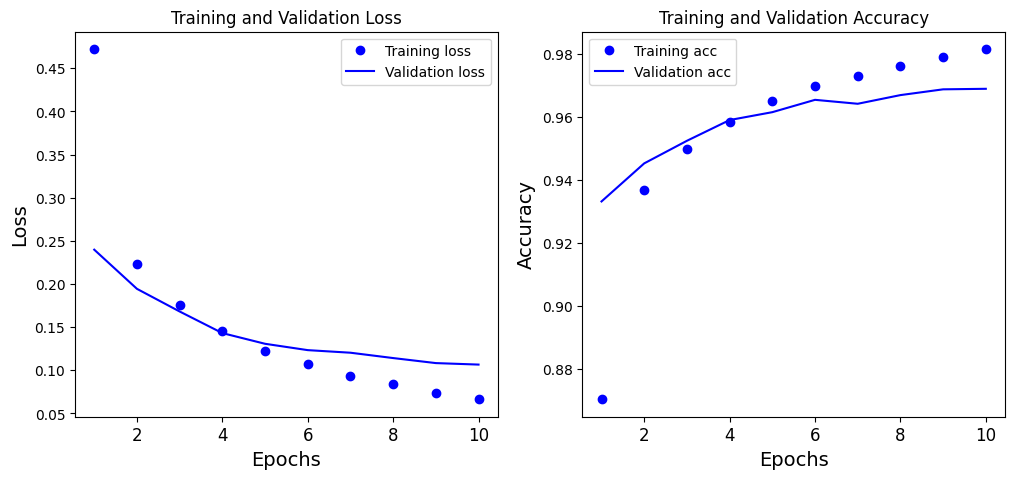

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento dos dados
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Construir o modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

# Plotar os resultados
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Observação:
* - O código acima é um exemplo genérico e pode precisar de ajustes dependendo dos detalhes específicos do problema. Além disso, o objetivo de atingir 98% de precisão pode depender da complexidade do problema e dos dados disponíveis. A escolha de hiperparâmetros e arquiteturas de rede pode exigir ajustes específicos para obter os melhores resultados.